In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from skimpy import skim
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.display.max_columns=100
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the file
df1 = pd.read_csv("/content/Unemployment in India.csv")
# printing the first 5 rows of the DataFrame
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# Print the shape of the DataFrame
df1.shape

(768, 7)

In [ ]:
# Reading the file
df2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
# printing the first 5 rows of the DataFrame
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df2.shape

(267, 9)

In [ ]:
# Combining two datasets
df=pd.concat([df1, df2], ignore_index=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1030,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
1031,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
1032,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
1033,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


In [ ]:
# Print the shape of the DataFrame
df.shape

(1035, 10)

In [ ]:
# Information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    1007 non-null   object 
 1    Date                                     1007 non-null   object 
 2    Frequency                                1007 non-null   object 
 3    Estimated Unemployment Rate (%)          1007 non-null   float64
 4    Estimated Employed                       1007 non-null   float64
 5    Estimated Labour Participation Rate (%)  1007 non-null   float64
 6   Area                                      740 non-null    object 
 7   Region.1                                  267 non-null    object 
 8   longitude                                 267 non-null    float64
 9   latitude                                  267 non-null    float64
dtypes: float64(5), object(5)
memory usag

In [ ]:
# showing all the names of columns
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
# we have to remove the white spaces in column names
df.rename(columns = {' Date':'Date',
                        ' Frequency': 'Frequency',
                        ' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate',
                        ' Estimated Employed': 'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate',
                        'longitude': 'latitude',
                        'latitude': 'longitude',
                        'Region.1': 'Part'}, inplace = True)

In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area',
       'Part', 'latitude', 'longitude'],
      dtype='object')

## Data Cleaning

In [ ]:
df_grp=df.groupby('Region')['Area'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Rename columns
df_grp.columns = ['Region', 'Mode_Area']
df_grp

,Region,Mode_Area
0,Andhra Pradesh,Rural
1,Assam,Urban
2,Bihar,Rural
3,Chandigarh,Urban
4,Chhattisgarh,Rural
5,Delhi,Rural
6,Goa,Rural
7,Gujarat,Rural
8,Haryana,Rural
9,Himachal Pradesh,Rural


In [ ]:
df.dropna(how='all', inplace=True)

In [ ]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,267
7,Part,740
8,latitude,740
9,longitude,740


In [ ]:
df.loc[df['Region'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude


In [ ]:
df.dropna(how='all', inplace=True)

In [ ]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,267
7,Part,740
8,latitude,740
9,longitude,740


#### Region

In [ ]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [ ]:
df['Region'].nunique()

28

In [ ]:
df['Region'].value_counts().reset_index()

,Region,count
0,Andhra Pradesh,38
1,Kerala,38
2,West Bengal,38
3,Uttar Pradesh,38
4,Tripura,38
5,Telangana,38
6,Tamil Nadu,38
7,Rajasthan,38
8,Punjab,38
9,Odisha,38


#### Area

In [ ]:
df_area=df.loc[df['Area'].isna(), 'Region'].reset_index()
df_area

,index,Region
0,768,Andhra Pradesh
1,769,Andhra Pradesh
2,770,Andhra Pradesh
3,771,Andhra Pradesh
4,772,Andhra Pradesh
...,...,...
262,1030,West Bengal
263,1031,West Bengal
264,1032,West Bengal
265,1033,West Bengal


In [ ]:
df_area['Region'].value_counts().reset_index()

,Region,count
0,Andhra Pradesh,10
1,Assam,10
2,Uttarakhand,10
3,Uttar Pradesh,10
4,Tripura,10
5,Telangana,10
6,Tamil Nadu,10
7,Rajasthan,10
8,Punjab,10
9,Puducherry,10


In [ ]:
def fill_area_mode(group):
    mode_value = group['Area'].mode().iloc[0]
    group['Area'].fillna(mode_value, inplace=True)
    return group
df['Area']=df.groupby('Region')['Area'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,0
7,Part,740
8,latitude,740
9,longitude,740


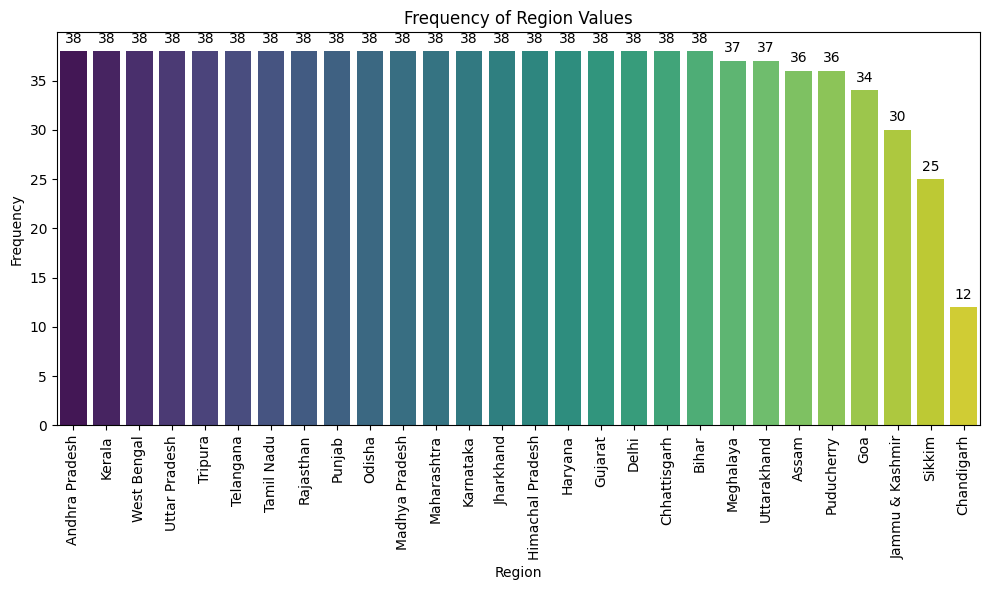

In [ ]:
value_counts_df = df['Region'].value_counts().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='Region', y='count', data=value_counts_df, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Region Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Display counts over the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.tight_layout()

# Show the plot
plt.show()

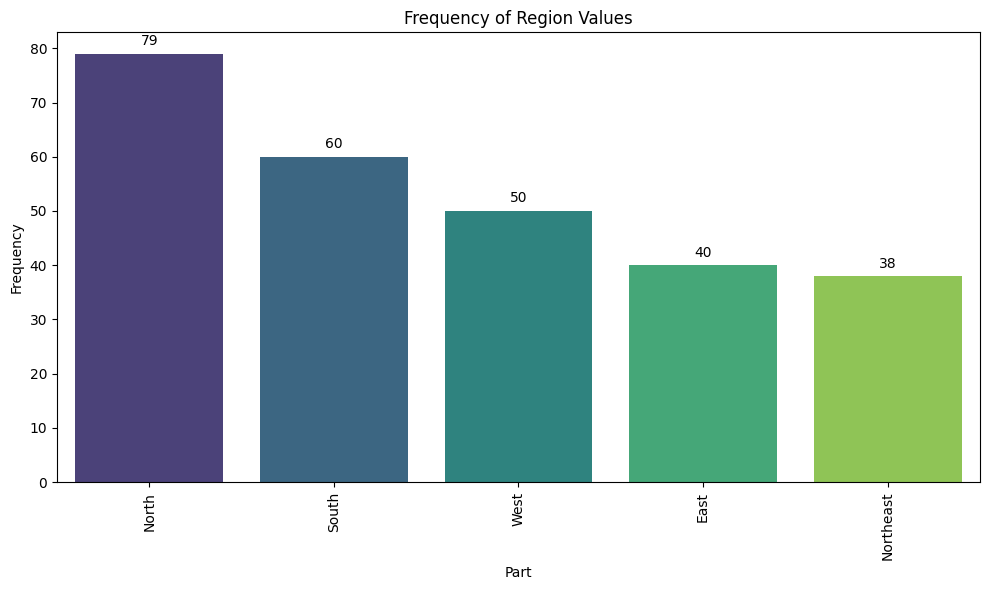

In [ ]:
value_counts_df = df['Part'].value_counts().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='Part', y='count', data=value_counts_df, palette='viridis')
plt.xlabel('Part')
plt.ylabel('Frequency')
plt.title('Frequency of Region Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Display counts over the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.tight_layout()

# Show the plot
plt.show()

#### Longitude

In [ ]:
df.groupby('Region')['longitude'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

,Region,longitude
0,Andhra Pradesh,79.7400
1,Assam,92.9376
2,Bihar,85.3131
3,Chandigarh,NaN
4,Chhattisgarh,81.8661
5,Delhi,77.1025
6,Goa,74.1240
7,Gujarat,71.1924
8,Haryana,76.0856
9,Himachal Pradesh,77.1734


In [ ]:
def fill_area_mode(group):
    mode_value = group['longitude'].mode().iloc[0]
    group['longitude'].fillna(mode_value, inplace=True)
    return group

df['longitude'] = df.groupby('Region')['longitude'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [ ]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,0
7,Part,740
8,latitude,740
9,longitude,12


In [ ]:
df[df['longitude'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude
415,Chandigarh,31-05-2019,Monthly,18.35,348042.0,44.89,Urban,NaN,NaN,NaN
416,Chandigarh,30-06-2019,Monthly,12.40,337145.0,40.44,Urban,NaN,NaN,NaN
417,Chandigarh,31-07-2019,Monthly,21.80,294379.0,39.47,Urban,NaN,NaN,NaN
418,Chandigarh,31-08-2019,Monthly,9.52,328282.0,37.95,Urban,NaN,NaN,NaN
419,Chandigarh,30-09-2019,Monthly,20.14,327239.0,42.77,Urban,NaN,NaN,NaN
420,Chandigarh,31-10-2019,Monthly,13.99,330856.0,40.06,Urban,NaN,NaN,NaN
421,Chandigarh,30-11-2019,Monthly,22.05,289593.0,38.60,Urban,NaN,NaN,NaN
422,Chandigarh,31-12-2019,Monthly,8.33,311146.0,35.19,Urban,NaN,NaN,NaN
423,Chandigarh,31-01-2020,Monthly,20.00,332062.0,42.94,Urban,NaN,NaN,NaN
424,Chandigarh,29-02-2020,Monthly,16.67,316887.0,39.25,Urban,NaN,NaN,NaN


In [ ]:
df.fillna(value={'longitude': 30.7333}, inplace=True)

In [ ]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,0
7,Part,740
8,latitude,740
9,longitude,0


## Latitude

In [ ]:
df.groupby('Region')['latitude'].apply(lambda x: x.mode().iloc[0]
if not x.mode().empty else None).reset_index()

,Region,latitude
0,Andhra Pradesh,15.9129
1,Assam,26.2006
2,Bihar,25.0961
3,Chandigarh,NaN
4,Chhattisgarh,21.2787
5,Delhi,28.7041
6,Goa,15.2993
7,Gujarat,22.2587
8,Haryana,29.0588
9,Himachal Pradesh,31.1048


In [ ]:
def fill_area_mode(group):
    mode_value = group['latitude'].mode().iloc[0]
    group['latitude'].fillna(mode_value, inplace=True)
    return group

df['latitude'] = df.groupby('Region')['latitude'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [ ]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,0
7,Part,740
8,latitude,12
9,longitude,0


In [ ]:
df.fillna(value={'latitude': 76.7794}, inplace=True)
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,0
7,Part,740
8,latitude,0
9,longitude,0


## Part

In [ ]:
df['Part'].value_counts().reset_index()

,Part,count
0,North,79
1,South,60
2,West,50
3,East,40
4,Northeast,38


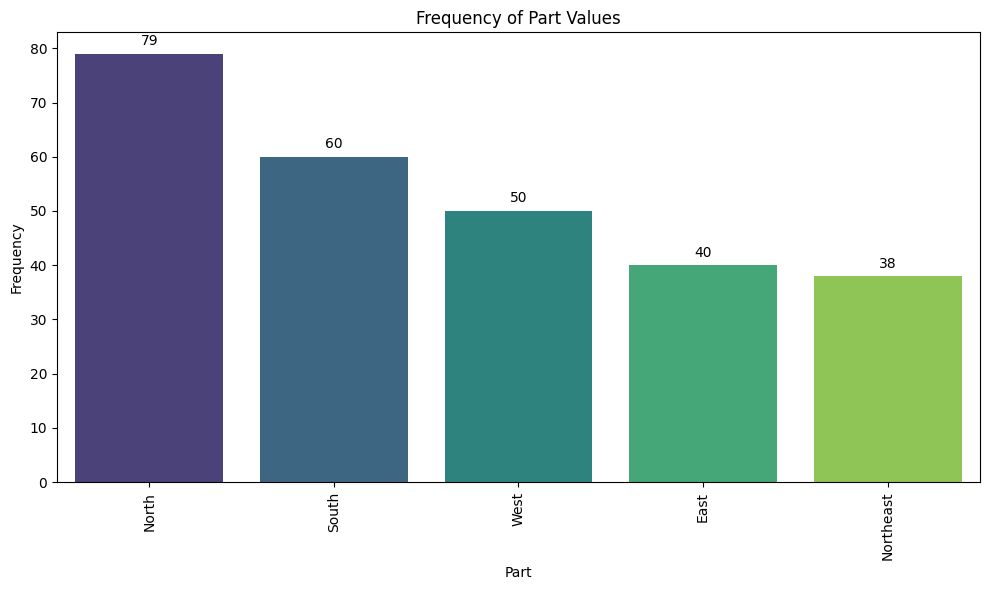

In [ ]:
value_counts_df = df['Part'].value_counts().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='Part', y='count', data=value_counts_df, palette='viridis')
plt.xlabel('Part')
plt.ylabel('Frequency')
plt.title('Frequency of Part Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Display counts over the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df.groupby('Region')['Part'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

,Region,Part
0,Andhra Pradesh,South
1,Assam,Northeast
2,Bihar,East
3,Chandigarh,None
4,Chhattisgarh,West
5,Delhi,North
6,Goa,West
7,Gujarat,West
8,Haryana,North
9,Himachal Pradesh,North


In [ ]:
def fill_area_mode(group):
    mode_value = group['Part'].mode().iloc[0]
    group['Part'].fillna(mode_value, inplace=True)
    return group

df['Part'] = df.groupby('Region')['Part'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [ ]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed,0
5,Estimated Labour Participation Rate,0
6,Area,0
7,Part,12
8,latitude,0
9,longitude,0


In [ ]:
df[df['Part'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude
415,Chandigarh,31-05-2019,Monthly,18.35,348042.0,44.89,Urban,NaN,76.7794,30.7333
416,Chandigarh,30-06-2019,Monthly,12.40,337145.0,40.44,Urban,NaN,76.7794,30.7333
417,Chandigarh,31-07-2019,Monthly,21.80,294379.0,39.47,Urban,NaN,76.7794,30.7333
418,Chandigarh,31-08-2019,Monthly,9.52,328282.0,37.95,Urban,NaN,76.7794,30.7333
419,Chandigarh,30-09-2019,Monthly,20.14,327239.0,42.77,Urban,NaN,76.7794,30.7333
420,Chandigarh,31-10-2019,Monthly,13.99,330856.0,40.06,Urban,NaN,76.7794,30.7333
421,Chandigarh,30-11-2019,Monthly,22.05,289593.0,38.60,Urban,NaN,76.7794,30.7333
422,Chandigarh,31-12-2019,Monthly,8.33,311146.0,35.19,Urban,NaN,76.7794,30.7333
423,Chandigarh,31-01-2020,Monthly,20.00,332062.0,42.94,Urban,NaN,76.7794,30.7333
424,Chandigarh,29-02-2020,Monthly,16.67,316887.0,39.25,Urban,NaN,76.7794,30.7333


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,South,15.9129,79.74
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,South,15.9129,79.74
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,South,15.9129,79.74
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,South,15.9129,79.74
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               1007 non-null   object 
 1   Date                                 1007 non-null   object 
 2   Frequency                            1007 non-null   object 
 3   Estimated Unemployment Rate          1007 non-null   float64
 4   Estimated Employed                   1007 non-null   float64
 5   Estimated Labour Participation Rate  1007 non-null   float64
 6   Area                                 1007 non-null   object 
 7   Part                                 995 non-null    object 
 8   latitude                             1007 non-null   float64
 9   longitude                            1007 non-null   float64
dtypes: float64(5), object(5)
memory usage: 118.8+ KB


In [ ]:
df_gm=df.groupby('Region')['Area'].apply(lambda x: x.mode().iloc[0]).reset_index()

df_gm.columns = ['Region', 'Mode_Area']
df_gm

,Region,Mode_Area
0,Andhra Pradesh,Rural
1,Assam,Urban
2,Bihar,Rural
3,Chandigarh,Urban
4,Chhattisgarh,Rural
5,Delhi,Rural
6,Goa,Rural
7,Gujarat,Rural
8,Haryana,Rural
9,Himachal Pradesh,Rural


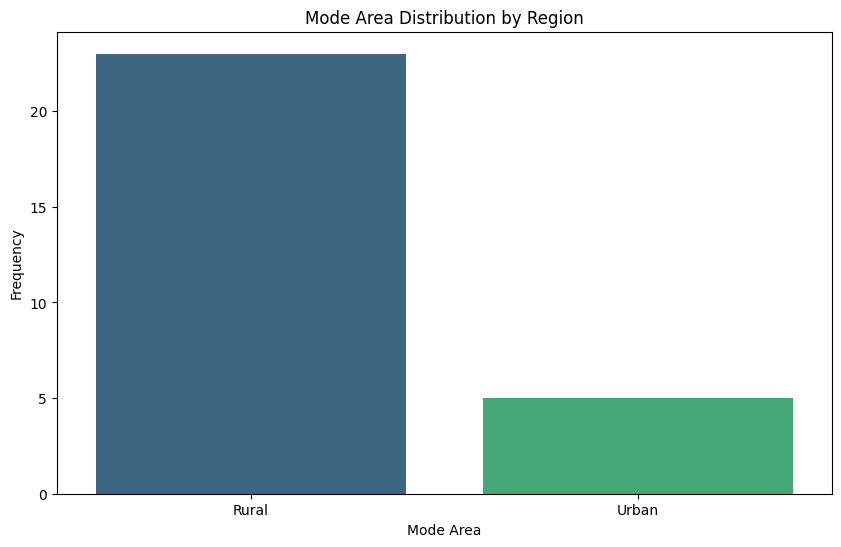

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df_gm, x='Mode_Area', palette='viridis')
plt.xlabel('Mode Area')
plt.ylabel('Frequency')
plt.title('Mode Area Distribution by Region')

# Show the plot
plt.show()

In [ ]:

urban_count = df_gm[df_gm['Mode_Area'] == 'Urban']['Region'].count()
rural_count = df_gm[df_gm['Mode_Area'] == 'Rural']['Region'].count()

labels = ['Urban', 'Rural']
values = [urban_count, rural_count]
df_pie = pd.DataFrame({'labels': labels, 'values': values})

fig = px.pie(df_pie, names='labels', values='values', title='Distribution of Urban and Rural Regions')

fig.update_layout(width=800, height=600)
fig.show()

### Checking all the columns

#### Region

In [ ]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [ ]:
df['Region'].value_counts().reset_index().sort_values(by='count', ascending=False)

,Region,count
0,Andhra Pradesh,38
11,Maharashtra,38
19,Bihar,38
18,Chhattisgarh,38
17,Delhi,38
16,Gujarat,38
15,Haryana,38
1,Kerala,38
13,Jharkhand,38
12,Karnataka,38


#### Date

In [ ]:
df['Date'].unique()

array([' 31-05-2019', ' 30-06-2019', ' 31-07-2019', ' 31-08-2019',
       ' 30-09-2019', ' 31-10-2019', ' 30-11-2019', ' 31-12-2019',
       ' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020', ' 31-07-2020', ' 31-08-2020',
       ' 30-09-2020', ' 31-10-2020'], dtype=object)

In [ ]:
# removing white spaces
df['Date']=df['Date'].str.replace(' ','')

In [ ]:
df['Date'].unique()

array(['31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019',
       '30-09-2019', '31-10-2019', '30-11-2019', '31-12-2019',
       '31-01-2020', '29-02-2020', '31-03-2020', '30-04-2020',
       '31-05-2020', '30-06-2020', '31-07-2020', '31-08-2020',
       '30-09-2020', '31-10-2020'], dtype=object)

#### Frequency

In [ ]:
df['Frequency'].unique()

array([' Monthly', 'Monthly', ' M'], dtype=object)

In [ ]:
df['Frequency']=df['Frequency'].str.replace(' Monthly', 'Monthly')
df['Frequency']=df['Frequency'].str.replace(' M', 'Monthly')

In [ ]:
df['Frequency'].unique()

array(['Monthly'], dtype=object)

#### Area

In [ ]:
df['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

#### Part

In [ ]:
df['Part'].unique()

array(['South', 'Northeast', 'East', 'West', 'North', nan], dtype=object)

In [ ]:
df.to_csv('Unemployment_combined.csv', index=False)

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,South,15.9129,79.74
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,South,15.9129,79.74
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,South,15.9129,79.74
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,South,15.9129,79.74
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,South,15.9129,79.74


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South,15.9129,79.74,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South,15.9129,79.74,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South,15.9129,79.74,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South,15.9129,79.74,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South,15.9129,79.74,2019,9


In [ ]:
import calendar
df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x])

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South,15.9129,79.74,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South,15.9129,79.74,2019,June
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South,15.9129,79.74,2019,July
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South,15.9129,79.74,2019,August
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South,15.9129,79.74,2019,September


# Data Visualization

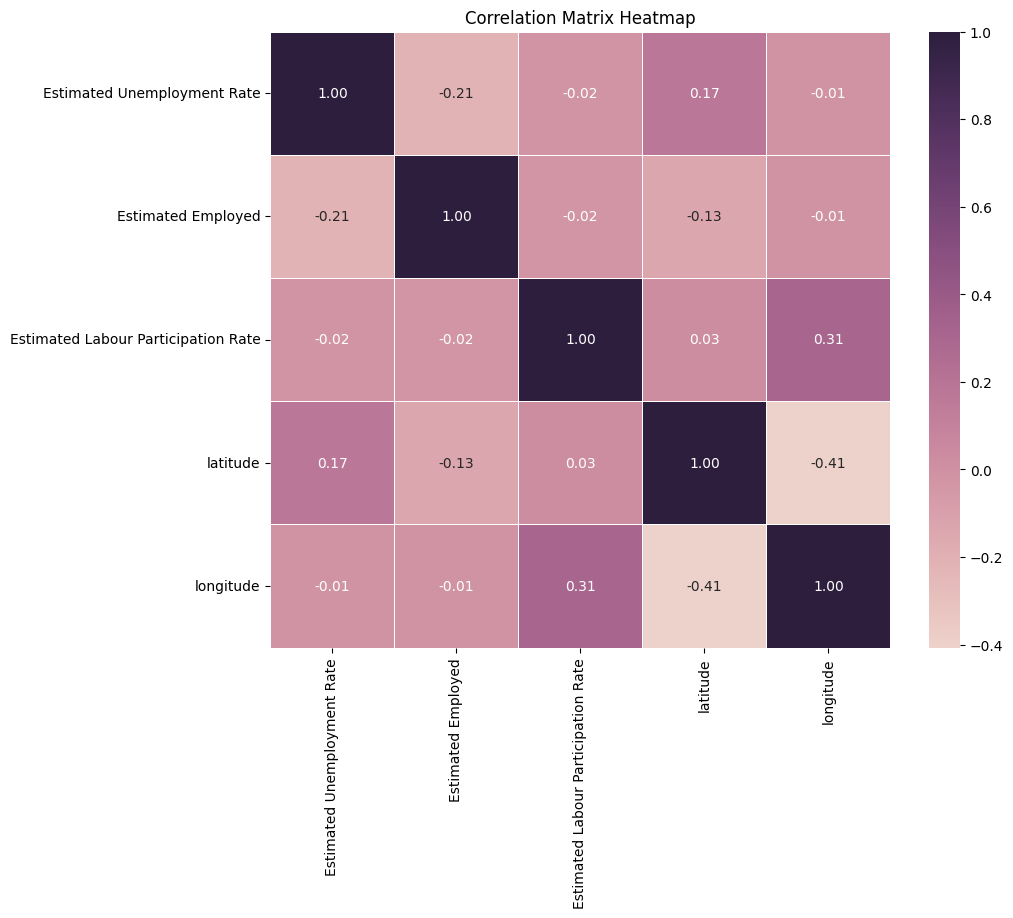

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

avg_unemployment_2019 = df_2019.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

combined_df = pd.merge(avg_unemployment_2019, avg_unemployment_2020, on='Region', suffixes=('_2019', '_2020'))

fig = px.bar(combined_df, x='Region', y=['Estimated Unemployment Rate_2019', 'Estimated Unemployment Rate_2020'],
             barmode='group', labels={'value': 'Unemployment Rate (%)'},
             title='Average Estimated Unemployment Rate by Region (2019 vs. 2020)')

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Unemployment Rate (%)',
    template='plotly_white'
)

fig.show()

In [ ]:
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

avg_labpart_2019 = df_2019.groupby('Region')['Estimated Labour Participation Rate'].mean().reset_index()
avg_labpart_2020 = df_2020.groupby('Region')['Estimated Labour Participation Rate'].mean().reset_index()

combined_df = pd.merge(avg_labpart_2019, avg_labpart_2020, on='Region', suffixes=('_2019', '_2020'))

fig = px.bar(combined_df, x='Region', y=['Estimated Labour Participation Rate_2019', 'Estimated Labour Participation Rate_2020'],
             barmode='group', labels={'value': 'Participation Rate (%)'},
             title='Average Estimated Labour Paricipation Rate by Region (2019 vs. 2020)')

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Participation Rate (%)',
    template='plotly_white'
)

fig.show()

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

avg_unemployment_2019 = df_2019.groupby(['Month', 'Area'])['Estimated Unemployment Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby(['Month', 'Area'])['Estimated Unemployment Rate'].mean().reset_index()

avg_unemployment_2019['Year'] = 2019
avg_unemployment_2020['Year'] = 2020

combined_df = pd.concat([avg_unemployment_2019, avg_unemployment_2020], ignore_index=True)

fig = px.bar(combined_df, x='Month', y='Estimated Unemployment Rate', color='Area', facet_col='Year',
             labels={'Estimated Unemployment Rate': 'Unemployment Rate (%)'},
             title='Unemployment Rate Comparison (2019 vs. 2020) by Area',
             color_discrete_map={'Rural': 'blue', 'Urban': 'red'})

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Unemployment Rate (%)',
    template='plotly_white'
)

fig.show()

In [ ]:
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='Region',
                     hover_name='Part',
                     size='Estimated Unemployment Rate',
                     animation_frame='Month',
                     scope='asia',
                     template='seaborn',
                     title='Impact of lockdown on Employment across regions')

fig.update_geos(lataxis_range=[5, 35], lonaxis_range=[65, 100], oceancolor="#3399FF", showocean=True)

fig.update_layout(width=1000, height=800)

fig.show()